In [1]:
!pip install -U torch==1.4.0 torchvision==0.5 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 640.6MB 29kB/s 
     |████████████████████████████████| 4.0MB 43.2MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 5.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=42b691f401f72738152a330ca7f24651a412e753d20c7084dbe0d416c0b16ca0
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-b

In [2]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.7MB 6.0MB/s 
     |████████████████████████████████| 2.2MB 12.7MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0.1-cp36-cp36m-linux_x86_64.whl size=266506 sha256=f8184facc8aba1913cf2d604de0b9f3aaa75dce0ec335621893e74bbe59ae44e
  Stored in directory: /root/.cache/pip/wheels/86/19/08/49b25f258ead1f861c9ab2fc41f73636f2928859adbb0e9797
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200716-cp36-none-any.whl size=42325 sha256=a5f4df08c903ad6ee1a4a3fe83a691889170824a377d5d0ab7434a4fc45e260f
  Stored in directory: /root/.cache/pip/wheels/81/99/f4/42a6bef61c07b3d78dfe6d7ebff259444c4526504cf72378d7
Successfully built pycocotools fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfull

In [3]:
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [4]:
!wget https://github.com/oumaiimaamara/labelimg_images/archive/master.zip

--2020-08-12 14:45:30--  https://github.com/oumaiimaamara/labelimg_images/archive/master.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/oumaiimaamara/labelimg_images/zip/master [following]
--2020-08-12 14:45:30--  https://codeload.github.com/oumaiimaamara/labelimg_images/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [              <=>   ]  67.29M  23.8MB/s    in 2.8s    

2020-08-12 14:45:34 (23.8 MB/s) - ‘master.zip’ saved [70558197]



In [5]:
!unzip master.zip

Archive:  master.zip
3eaba3310f179afb145a2306a07b65271d69eb1e
   creating: labelimg_images-master/
  inflating: labelimg_images-master/test.json  
   creating: labelimg_images-master/test/
 extracting: labelimg_images-master/test/1.PNG  
  inflating: labelimg_images-master/test/1.xml  
 extracting: labelimg_images-master/test/2.PNG  
  inflating: labelimg_images-master/test/2.xml  
 extracting: labelimg_images-master/test/3.PNG  
  inflating: labelimg_images-master/test/3.xml  
 extracting: labelimg_images-master/test/4.PNG  
  inflating: labelimg_images-master/test/4.xml  
  inflating: labelimg_images-master/train.json  
   creating: labelimg_images-master/train/
 extracting: labelimg_images-master/train/10.PNG  
  inflating: labelimg_images-master/train/10.xml  
 extracting: labelimg_images-master/train/11.PNG  
  inflating: labelimg_images-master/train/11.xml  
 extracting: labelimg_images-master/train/12.PNG  
  inflating: labelimg_images-master/train/12.xml  
 extracting: labelimg

In [6]:
!pip install opencv-python

In [7]:
from detectron2.data.datasets import register_coco_instances
import cv2
for d in ["train", "test"]:
    register_coco_instances(f"pool0_{d}", {}, f"labelimg_images-master/{d}.json", f"labelimg_images-master/{d}")

WARNING [08/12 14:45:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/12 14:45:39 d2.data.datasets.coco]: Loaded 16 images in COCO format from labelimg_images-master/train.json


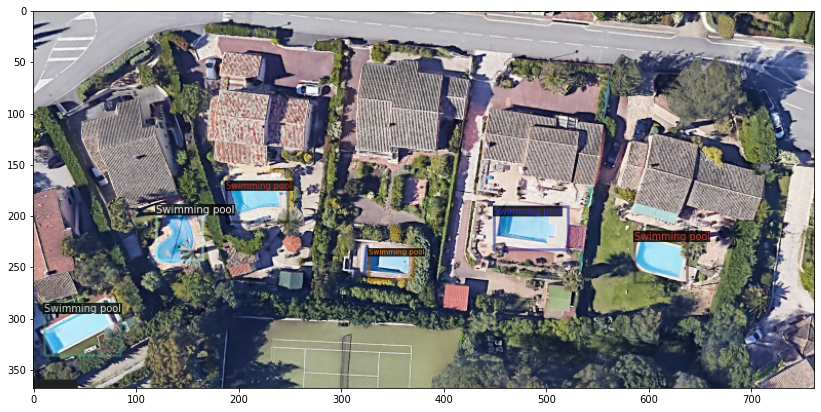

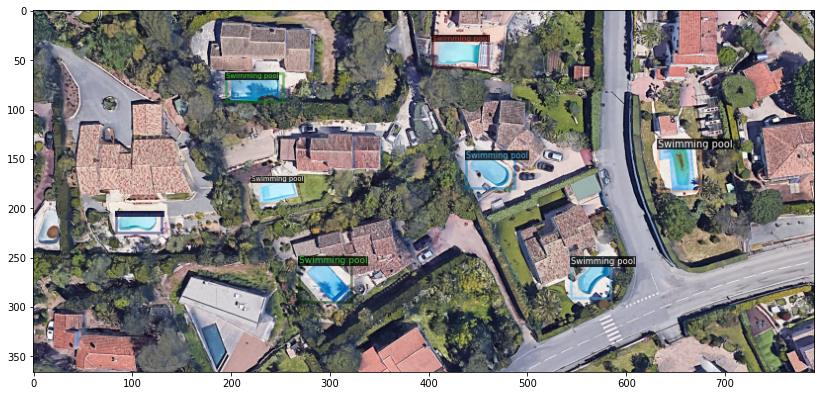

In [8]:
import random
from detectron2.data import DatasetCatalog, MetadataCatalog

dataset_dicts = DatasetCatalog.get("pool0_train")
pool0_metadata = MetadataCatalog.get("pool0_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d['file_name'])
    v = Visualizer(img[:, :, ::-1], metadata=pool0_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [9]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os 
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"))
cfg.DATASETS.TRAIN = ("pool0_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

WARNING [08/12 14:45:41 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
[08/12 14:45:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (

model_final_721ade.pkl: 136MB [00:03, 43.4MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (2, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (4, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[08/12 14:45:50 d2.engine.train_loop]: Starting training from iteration 0
[08/12 14:46:20 d2.utils.events]:  eta: 0:23:45  iter: 19  total_loss: 1.013  loss_cls: 0.579  loss_box_reg: 0.200  loss_rpn_cls: 0.218  loss_rpn_loc: 0.019  time: 1.4526  data_time: 0.0227  lr: 0.000005  max_mem: 4585M
[08/12 14:46:50 d2.utils.events]:  eta: 0:23:33  iter: 39  total_loss: 0.968  loss_cls: 0.534  loss_box_reg: 0.213  loss_rpn_cls: 0.187  loss_rpn_loc: 0.018  time: 1.4732  data_time: 0.0058  lr: 0.000010  max_mem: 4622M
[08/12 14:47:21 d2.utils.events]:  eta: 0:23:24  iter: 59  total_loss: 0.861  loss_cls: 0.460  loss_box_reg: 0.234  loss_rpn_cls: 0.150  loss_rpn_loc: 0.018  time: 1.4993  data_time: 0.0053  lr: 0.000015  max_mem: 4622M
[08/12 14:47:52 d2.utils.events]:  eta: 0:23:15  iter: 79  total_loss: 0.806  loss_cls: 0.394  loss_box_reg: 0.264  loss_rpn_cls: 0.132  loss_rpn_loc: 0.017  time: 1.5193  data_time: 0.0055  lr: 0.000020  max_mem: 4622M
[08/12 14:48:25 d2.utils.events]:  eta: 0:23:1

In [14]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("pool0_test", )
predictor = DefaultPredictor(cfg)

WARNING [08/12 15:34:18 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


WARNING [08/12 15:36:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/12 15:36:52 d2.data.datasets.coco]: Loaded 16 images in COCO format from labelimg_images-master/train.json


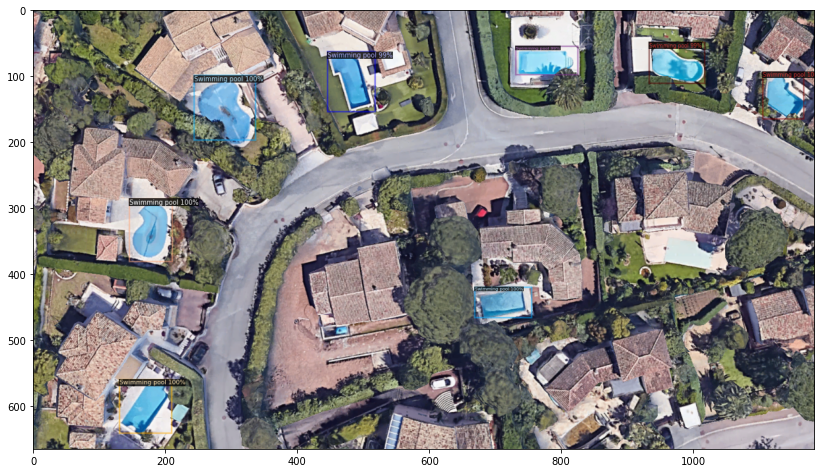

In [16]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("pool0_train")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=pool0_metadata, 
                   scale=0.8, 
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()